In [236]:
# Bài toán dự đoán tuổi của bào ngư (Cột Rings nằm ở cuối cùng là cột tuổi của bào ngư)

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [238]:
# read file
df = pd.read_csv(r'C:\Users\QUANG\OneDrive\Máy tính\abalone.data.txt')
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [239]:
# Tạo bản sau của dữ liệu df ban đầu để khi df này chuyển thành nhãn thì df kia không bị chuyển thành nhãn (vẫn dữ nguyên dữ liệu ban đầu)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le = df.copy()
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        le.fit(df_le[df.columns[i]])
        df_le[df.columns[i]] = le.transform(df_le[df.columns[i]])
        
print('\ndf:\n',df)
print('\ndf_le:\n',df_le)


df:
      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3

In [240]:
data = df_le.values
X = data[:,:-1]
y = data[:,-1]
print('X:')
print(X)
print('\ny:')
print(y)
print('\nX.shape =',X.shape)
print('\ny.shape =',y.shape)

X:
[[2.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [2.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [0.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [2.     0.71   0.555  ... 0.9455 0.3765 0.495 ]]

y:
[15.  7.  9. ...  9. 10. 12.]

X.shape = (4177, 8)

y.shape = (4177,)


In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
print('X_train:')
print(X_train)
print('\nX_train.shape =',X_train.shape)
print('\nX_test:')
print(X_test)
print('\nX_test.shape =',X_test.shape)
print('\ny_train:')
print(y_train)
print('\ny_train.shape =',y_train.shape)
print('\ny_test')
print(y_test)
print('\ny_test.shape =',y_test.shape)

X_train:
[[0.     0.615  0.455  ... 0.4735 0.263  0.274 ]
 [0.     0.515  0.395  ... 0.281  0.1255 0.22  ]
 [2.     0.66   0.53   ... 0.7395 0.3505 0.405 ]
 ...
 [2.     0.51   0.395  ... 0.244  0.1335 0.188 ]
 [2.     0.575  0.465  ... 0.516  0.2185 0.235 ]
 [0.     0.595  0.475  ... 0.547  0.231  0.271 ]]

X_train.shape = (3132, 8)

X_test:
[[2.     0.605  0.455  ... 0.421  0.3015 0.325 ]
 [2.     0.59   0.44   ... 0.387  0.215  0.245 ]
 [0.     0.56   0.445  ... 0.305  0.2245 0.335 ]
 ...
 [2.     0.635  0.51   ... 0.544  0.318  0.377 ]
 [2.     0.46   0.375  ... 0.192  0.1045 0.205 ]
 [0.     0.53   0.385  ... 0.289  0.151  0.18  ]]

X_test.shape = (1045, 8)

y_train:
[ 9. 12. 10. ... 11.  9.  6.]

y_train.shape = (3132,)

y_test
[ 9.  8. 16. ...  8.  9. 10.]

y_test.shape = (1045,)


In [242]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
K = int (math.sqrt(X_train.shape[0]))
if K % 2 == 0:
    K+=1
KNN = KNeighborsClassifier(n_neighbors=K)
print(KNN)
KNN.fit(X_train,y_train)
y_predict_KNN = KNN.predict(X_test)
count_error_KNN = 0
for i in range(len(y_predict_KNN)):
    if y_predict_KNN[i] != y_test[i]:
        count_error_KNN+=1
print('error = %d/%d  (%.2f) ' %(count_error_KNN,len(y_predict_KNN),(count_error_KNN*100/len(y_predict_KNN))) + '%')

KNeighborsClassifier(n_neighbors=55)
error = 762/1045  (72.92) %


In [243]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print(gnb)
gnb.fit(X_train,y_train)
y_predict_GNB = gnb.predict(X_test)
count_error_GNB = 0
for i in range(len(y_predict_GNB)):
    if y_predict_GNB[i] != y_test[i]:
        count_error_GNB+=1
print('error = %d/%d  (%.2f) ' %(count_error_GNB,len(y_predict_GNB),(count_error_GNB*100/len(y_predict_GNB))) + '%')

GaussianNB()
error = 800/1045  (76.56) %


In [244]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
print(mnb)
mnb.fit(X_train,y_train)
y_predict_MNB = mnb.predict(X_test)
count_error_MNB = 0
for i in range(len(y_predict_MNB)):
    if y_predict_MNB[i] != y_test[i]:
        count_error_MNB+=1
print('error = %d/%d  (%.2f) ' %(count_error_MNB,len(y_predict_MNB),(count_error_MNB*100/len(y_predict_MNB))) + '%')

MultinomialNB()
error = 870/1045  (83.25) %


In [245]:
# ComplementNB
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
print(cnb)
cnb.fit(X_train,y_train)
y_predict_CNB = cnb.predict(X_test)
count_error_CNB = 0
for i in range(len(y_predict_CNB)):
    if y_predict_CNB[i] != y_test[i]:
        count_error_CNB+=1
print('error = %d/%d  (%.2f) ' %(count_error_CNB,len(y_predict_CNB),(count_error_CNB*100/len(y_predict_CNB))) + '%')

ComplementNB()
error = 882/1045  (84.40) %


In [246]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
print(bnb)
bnb.fit(X_train,y_train)
y_predict_BNB = bnb.predict(X_test)
count_error_BNB = 0
for i in range(len(y_predict_BNB)):
    if y_predict_BNB[i] != y_test[i]:
        count_error_BNB+=1
print('error = %d/%d  (%.2f) ' %(count_error_BNB,len(y_predict_BNB),(count_error_BNB*100/len(y_predict_BNB))) + '%')

BernoulliNB()
error = 882/1045  (84.40) %


In [247]:
# CategoricalNB
from sklearn.naive_bayes import CategoricalNB
catnb = CategoricalNB()
print(catnb)
catnb.fit(X_train,y_train)
y_predict_CATNB = catnb.predict(X_test)
count_error_CATNB = 0
for i in range(len(y_predict_CATNB)):
    if y_predict_CATNB[i] != y_test[i]:
        count_error_CATNB+=1
print('error = %d/%d  (%.2f) ' %(count_error_CATNB,len(y_predict_CATNB),(count_error_CATNB*100/len(y_predict_CATNB))) + '%')

CategoricalNB()
error = 824/1045  (78.85) %


In [248]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lrs = LinearRegression()
print(lrs)
lrs.fit(X_train,y_train)
y_predict_LNR = lrs.predict(X_test)
count_error_LNR = 0
for i in range(len(y_predict_LNR)):
    if int(y_predict_LNR[i]) != y_test[i]:
        count_error_LNR+=1
print('error = %d/%d  (%.2f) ' %(count_error_LNR,len(y_predict_LNR),(count_error_LNR*100/len(y_predict_LNR))) + '%')

LinearRegression()
error = 784/1045  (75.02) %


In [249]:
# DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier()
print(dt)
dt.fit(X_train,y_train)
y_predict_DT = dt.predict(X_test)
count_error_DT = 0
for i in range(len(y_predict_DT)):
    if int(y_predict_DT[i]) != y_test[i]:
        count_error_DT+=1
print('error = %d/%d  (%.2f) ' %(count_error_DT,len(y_predict_DT),(count_error_DT*100/len(y_predict_DT))) + '%')

DecisionTreeClassifier()
error = 801/1045  (76.65) %


In [250]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
print(rf)
rf.fit(X_train,y_train)
y_predict_RF = rf.predict(X_test)
count_error_RF = 0
for i in range(len(y_predict_RF)):
    if int(y_predict_RF[i]) != y_test[i]:
        count_error_RF+=1
print('error = %d/%d  (%.2f) ' %(count_error_RF,len(y_predict_RF),(count_error_RF*100/len(y_predict_RF))) + '%')

RandomForestClassifier()
error = 775/1045  (74.16) %


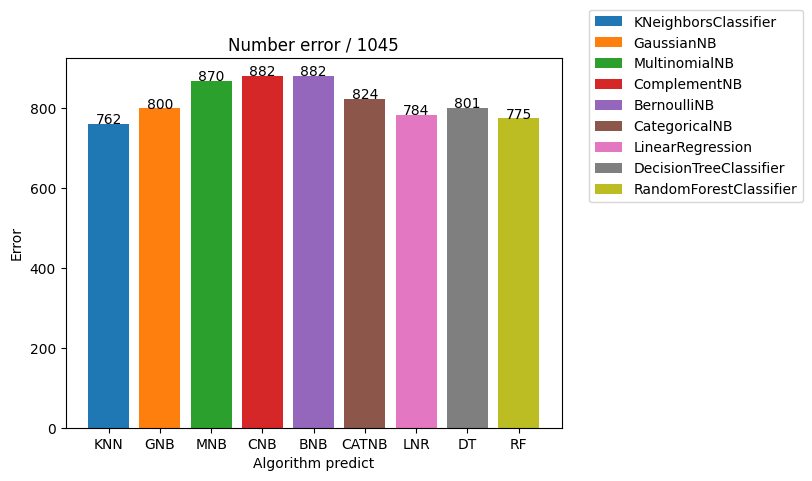

In [251]:
# graph
x_axis = ['KNN','GNB','MNB','CNB','BNB','CATNB','LNR','DT','RF']
y_axis = [count_error_KNN,count_error_GNB,count_error_MNB,count_error_CNB,count_error_BNB,count_error_CATNB,count_error_LNR,count_error_DT,count_error_RF]
fig, ax = plt.subplots()
for i in range(len(x_axis)):
    plt.bar(x_axis[i],y_axis[i])
    plt.text(x_axis[i],y_axis[i],str(y_axis[i]),horizontalalignment='center')
plt.legend(['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB','BernoulliNB','CategoricalNB','LinearRegression','DecisionTreeClassifier','RandomForestClassifier'],bbox_to_anchor =(1.5, 1.15))
plt.title('Number error / %d' % len(y_test))
plt.xlabel('Algorithm predict')
plt.ylabel('Error')
plt.show()